##### 题目四：使用 numpy 编写逻辑回归算法，对 iris 数据进行二分类

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from sklearn.datasets import load_iris
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
plt.rcParams['font.family'] = 'SimHei'      # 中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 符号正常显示


In [21]:
# 加载 iris 数据集
iris = load_iris()
X = iris.data[:, :2]  # 使用前两个特征
y = iris.target
X = X[y != 2]   # 使用前两个类别的数据
y = y[y != 2]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555, stratify=y)
# 设置随机种子以保证结果可复现
np.random.seed(555)
# 设置测试集的比例
test_ratio = 0.2
# 确定数据集中有哪些类别，手写实现了stratify参数的按类别划分功能
classes = np.unique(y)
# 初始化训练集和测试集
X_train = []
X_test = []
y_train = []
y_test = []

# 对每一个类别进行操作
for c in classes:
    # 找到所有属于这个类别的样本
    idx = np.where(y == c)[0]
    # 随机打乱这些样本
    np.random.shuffle(idx)
    
    # 计算测试集的大小
    test_size = int(len(idx) * test_ratio)
    
    # 根据打乱的索引数组划分训练集和测试集
    X_test.extend(X[idx[:test_size]])
    y_test.extend(y[idx[:test_size]])
    X_train.extend(X[idx[test_size:]])
    y_train.extend(y[idx[test_size:]])

# 将训练集和测试集从列表转换为 numpy 数组
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [22]:
# 定义逻辑回归模型
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):# 为 X 增加一列全 1 的特征，构造类时 fit_intercept 设为 True 时会用到
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):# sigmoid 函数，构造类时会用到
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        # 拟合函数，X 为训练集的特征，y 为训练集的标签
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            # 计算预测值
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size    # 计算梯度，y.size 为样本数量
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        # 预测函数，X 为测试集的特征
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold    # 大于等于阈值的返回 True

# Stratified train/test split
def stratified_train_test_split(X, y, test_ratio, random_seed):
    # 这个函数的作用是按类别划分训练集和测试集，test_ratio 是测试集的比例，random_seed 是随机种子
    np.random.seed(random_seed)
    classes = np.unique(y)
    X_train, X_test, y_train, y_test = [], [], [], []
    for c in classes:
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)
        test_size = int(len(idx) * test_ratio)
        X_test.extend(X[idx[:test_size]])
        y_test.extend(y[idx[:test_size]])
        X_train.extend(X[idx[test_size:]])
        y_train.extend(y[idx[test_size:]])
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)


决策函数的权重：[ 5.87744704 -9.13700834]
决策函数的偏置：-3.2138157290239615
决策函数表达式：y = 5.877447040363706 * x1 + -9.137008339882579 * x2 + -3.2138157290239615
训练集 Accuracy: 0.9916666666666667
测试集 Accuracy: 1.0


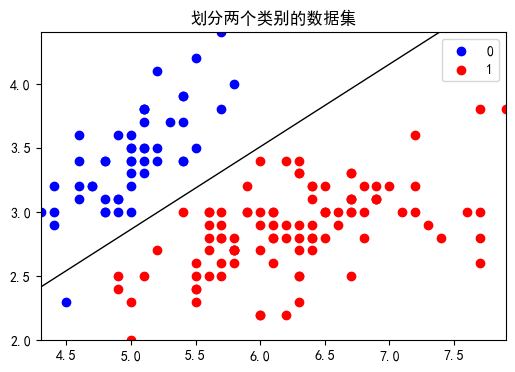

In [30]:
iris = load_iris()
X = iris.data[:, :2] 
y = (iris.target != 0) * 1 

# 划分数据集
X_train, X_test, y_train, y_test = stratified_train_test_split(X, y, test_ratio=0.2, random_seed=555)

# 训练模型
model = LogisticRegression(lr=0.1, num_iter=10000)
model.fit(X_train, y_train)
# 输出：决策函数的权重、偏置和函数表达式
coef_ = model.theta[1:]
intercept_ = model.theta[0]
print(f'决策函数的权重：{coef_}')
print(f'决策函数的偏置：{intercept_}')
print(f'决策函数表达式：y = {coef_[0]} * x1 + {coef_[1]} * x2 + {intercept_}')

# 预测训练集
preds = model.predict(X_train)
accuracy = (preds == y_train).mean()
print(f'训练集 Accuracy: {accuracy}')

# 预测测试集
preds = model.predict(X_test)
accuracy = (preds == y_test).mean()
print(f'测试集 Accuracy: {accuracy}')

# 可视化
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');  
plt.title('划分两个类别的数据集')
plt.show()